# Data Import & Preprocessing

In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [135]:
# Import dataset
customer_df = pd.read_excel("/content/drive/MyDrive/Octave - John Keells Codes/Online Retail.xlsx")

In [136]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [137]:
customer_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


##Outliers Handling

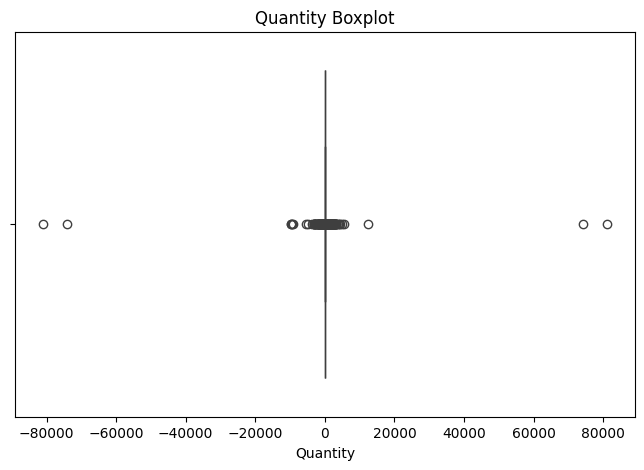

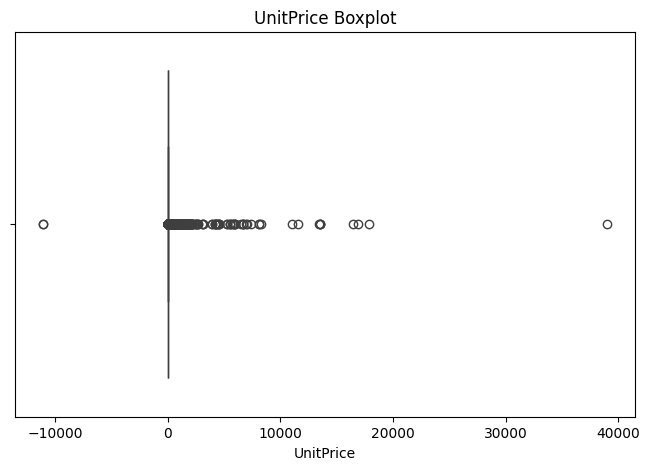

In [138]:
# Boxplots for numeric columns to identify distribution and outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=customer_df["Quantity"])
plt.title("Quantity Boxplot")
plt.xlabel("Quantity")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=customer_df["UnitPrice"])
plt.title("UnitPrice Boxplot")
plt.xlabel("UnitPrice")
plt.show()

In [139]:
# Derive Q1,Q3,IQR,Upper Boundry,Lower Boundry, and outliers for 'Quantity' column

q1_quantity = customer_df["Quantity"].quantile(0.25)
q3_quantity = customer_df["Quantity"].quantile(0.75)

quantity_iqr = q3_quantity - q1_quantity

quantity_lower_boundry = q1_quantity - 1.5*quantity_iqr
quantity_upper_boundry = q3_quantity + 1.5*quantity_iqr

outliers = customer_df[(customer_df["Quantity"] < quantity_lower_boundry) | (customer_df["Quantity"] > quantity_upper_boundry)]

outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom


In [140]:
# Derive Q1,Q3,IQR,Upper Boundry,Lower Boundry, and outliers for 'UnitPrice' column

q1_unitprice = customer_df["UnitPrice"].quantile(0.25)
q3_unitprice = customer_df["UnitPrice"].quantile(0.75)

iqr_unitprice = q3_unitprice - q1_unitprice

unitprice_upper_boundry = q3_unitprice + 1.5*iqr_unitprice
unitprice_lower_boundry = q1_unitprice - 1.5*iqr_unitprice

outliers = customer_df[(customer_df["UnitPrice"] < unitprice_lower_boundry) | (customer_df["UnitPrice"] > unitprice_upper_boundry)]

outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2010-12-01 09:45:00,14.95,16098.0,United Kingdom
...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2011-12-09 12:16:00,11.95,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,2011-12-09 12:19:00,8.50,17581.0,United Kingdom
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,2011-12-09 12:20:00,9.95,12748.0,United Kingdom


In [141]:
# Removing outliers from dataset

customer_df = customer_df[((customer_df["Quantity"] >= quantity_lower_boundry) & (customer_df["UnitPrice"] >= unitprice_lower_boundry)) &
                          ((customer_df["Quantity"] <= quantity_upper_boundry) & (customer_df["UnitPrice"] <= unitprice_upper_boundry))]

In [142]:
customer_df.shape

(444108, 8)

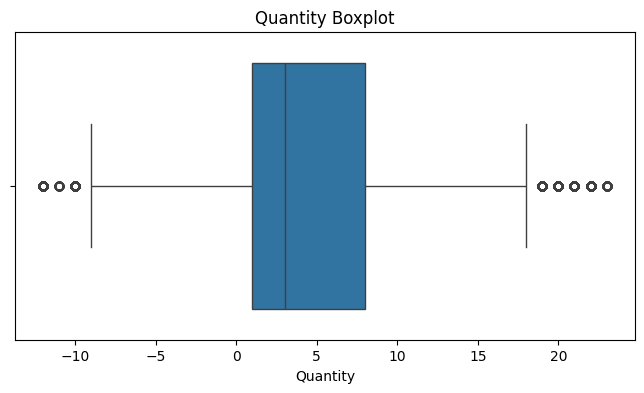

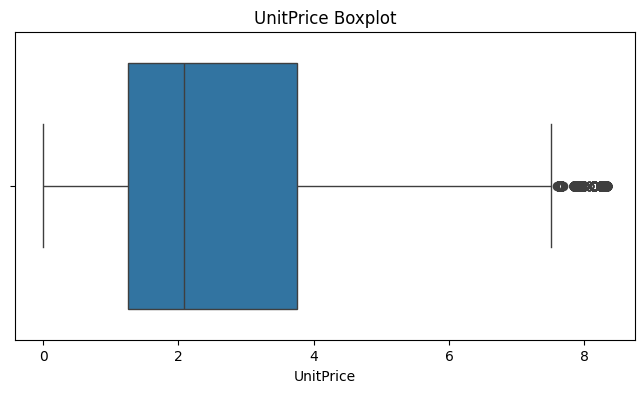

In [143]:
plt.figure(figsize=(8,4))
sns.boxplot(x=customer_df["Quantity"])
plt.title("Quantity Boxplot")
plt.xlabel("Quantity")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=customer_df["UnitPrice"])
plt.title("UnitPrice Boxplot")
plt.xlabel("UnitPrice")
plt.show()

##Handling Null Values

In [144]:
customer_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,802
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,116610
Country,0


In [145]:
customer_df = customer_df.dropna(subset=["CustomerID"])
customer_df = customer_df.dropna(subset=["Description"])

##Encoding, Feature Engineering, and Feature Scaling

In [146]:
label_encorder = LabelEncoder()
customer_df["Country"] = label_encorder.fit_transform(customer_df["Country"])

In [147]:
customer_df["TotalSales"] = customer_df["UnitPrice"] * customer_df["Quantity"]

In [148]:
customer_df = customer_df[["CustomerID","Country","TotalSales"]].drop_duplicates(subset=["CustomerID"])

In [149]:
customer_df = customer_df.set_index("CustomerID")

In [150]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(customer_df)

customer_df = pd.DataFrame(scaled_features, index=customer_df.index, columns=customer_df.columns)

customer_df.head(3)

,Country,TotalSales
CustomerID,,
17850.0,0.293367,-0.059209
13047.0,0.293367,-0.234249
12583.0,-3.252908,1.866235


#K-Means Clustering

##Elbow method for optimal number of clusters (k) identification

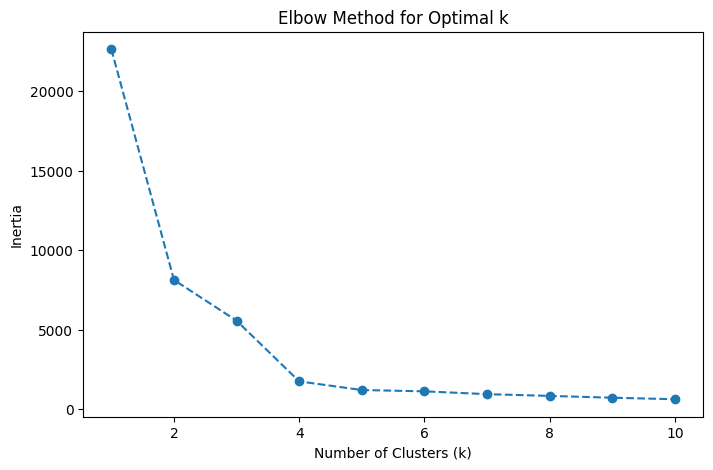

In [167]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
cluster_range = range(1, 11)  # Testing clusters from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_df)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

##Model Building with optimum k value

**Inertia measures how close data points are to their assigned cluster centers. Lower inertia is better.**


**Look for the "elbow point", where inertia stops decreasing significantly.**

In [173]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(customer_df)
customer_df["Label"] = kmeans.labels_

#Model Evaluation

In [174]:
# Inertia measures how close data points are to their assigned cluster centers. Lower inertia is better.
print(f"Inertia: {kmeans.inertia_}")

Inertia: 1705.1438811376418


In [175]:
customer_df["Label"].value_counts()

,count
Label,
2,2192
0,1460
1,314
3,233


In [176]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(customer_df, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.7832351121096404


Silhouette Score measures the quality of clustering by evaluating how well each point fits within its assigned cluster versus other clusters.

It is calculated as:

**S = (b-a)/max(a,b)**

where:

a = Average distance of a point to other points in the same cluster (cohesion)

b = Average distance of a point to points in the nearest different cluster (separation)

1.0	  - Perfect clustering (very well-separated clusters)

0.5   - 1.0	Well-separated clusters (good clustering)

0.0   - 0.5	Somewhat overlapping clusters (may need tuning)

< 0.0 -	Poor clustering (points assigned to wrong clusters)

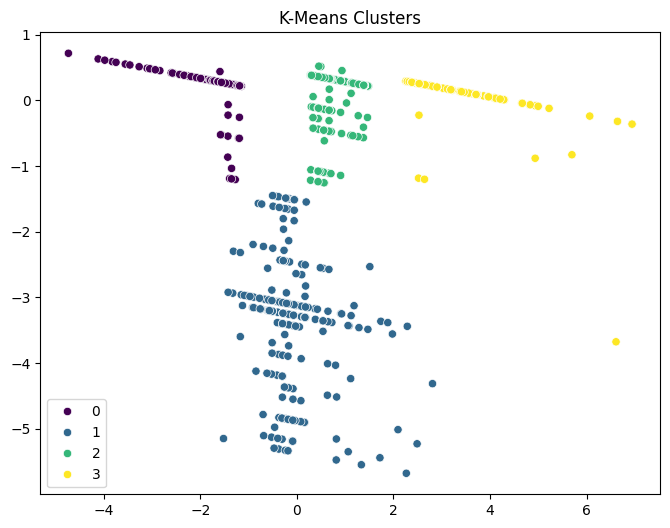

In [181]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=kmeans.labels_, palette="viridis")
plt.title("K-Means Clusters")
plt.show()
